<a href="https://colab.research.google.com/github/Dealer2112/CoderHouse/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.Abstracto con Motivación y Audiencia
## Motivación: Analizar los días de mora en relación con el departamento puede proporcionar información valiosa sobre las diferencias regionales que influyen en el comportamiento de pago. Este conocimiento permitirá a las instituciones financieras, como Red Kobra, diseñar estrategias de cobro más efectivas y adaptadas a cada región.

###Audiencia:
###Instituciones financieras y bancarias
###Agencias de cobranza
###Investigadores y analistas de datos
###Entidades gubernamentales y organizaciones no lucrativas

In [ ]:
#2 Hipótesis y Preguntas para Responder la Hipótesis
## Hipótesis: Existe una asociación entre el número de días en mora de los clientes y el departamento al que pertenecen. Se espera que ciertos departamentos presenten un mayor número de días en mora en comparación con otros, reflejando diferencias en factores económicos, sociales o regionales. Este análisis se realiza utilizando la base de datos de la empresa Red Kobra para conocer y predecir la morosidad en diversas regiones de México.

## Preguntas para Responder la Hipótesis:
### ¿Se observa una asociación significativa entre el número de días en mora de los clientes y los diferentes estados de México?
### ¿Los estados con mayores índices de morosidad están concentrados en regiones específicas del país?
### ¿Qué estados presentan un mayor número de días en mora en comparación con otros, y cómo estas diferencias pueden estar relacionadas con las características socioeconómicas de cada región?

In [ ]:
#3 Análisis Exploratorio de Datos (EDA)
#3.1 Carga y Visualización de Datos
import pandas as pd

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel("/content/dataset_visitas primera_entrega.xlsx")

# Visualizar el DataFrame
print(df.head())  # Muestra las primeras filas del DataFrame

         fecha_visita folio_visita tipo_visita    latitud    longitud  \
0 2022-06-24 12:45:32  6A5301V8272    Cobranza  193486923  -991841276   
1 2022-06-27 17:57:27  6A5301V8275    Cobranza  193475709   -99182935   
2 2022-07-23 11:19:49     6A8953V6    Cobranza  206958019 -1033802097   
3 2022-07-31 10:44:25     6A9024V1    Cobranza  205844593   -10337852   
4 2022-08-11 14:21:11    6A4721V71    Cobranza  255936668 -1002648589   

               municipio            estado  dias_mora  \
0         ALVARO OBREGON  CIUDAD DE MEXICO        686   
1         ALVARO OBREGON  CIUDAD DE MEXICO        686   
2  SAN PEDRO TLAQUEPAQUE           JALISCO        613   
3  SAN PEDRO TLAQUEPAQUE           JALISCO        613   
4              MONTERREY        NUEVO LEON        184   

                               nombre_agente  id_agente  
0                      ARTURO SANCHEZ OROZCO      25791  
1                      ARTURO SANCHEZ OROZCO      25791  
2              PABLO MISAEL PICAZO GUTIERREZ

In [ ]:
#3.2 Resumen de información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha_visita   1921 non-null   datetime64[ns]
 1   folio_visita   1921 non-null   object        
 2   tipo_visita    1921 non-null   object        
 3   latitud        1921 non-null   int64         
 4   longitud       1921 non-null   int64         
 5   municipio      1921 non-null   object        
 6   estado         1921 non-null   object        
 7   dias_mora      1921 non-null   int64         
 8   nombre_agente  1921 non-null   object        
 9   id_agente      1921 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 150.2+ KB


In [ ]:
#3.3 Dimensiones del DataFrame
df.shape

(1921, 10)

In [ ]:
#3.4 Descripción de las variables en el conjunto de datos:
# 1. fecha_visita: La fecha y hora en que se realizó la visita.
# 2. folio_visita: Identificador único asignado a cada visita.
# 3. tipo_visita: Propósito o tipo de visita realizada (en este caso, "Cobranza", lo que sugiere visitas relacionadas con la recuperación de pagos pendientes).
# 4. latitud: Coordenada geográfica de la ubicación de la visita en formato decimal.
# 5. longitud: Coordenada geográfica de la ubicación de la visita en formato decimal.
# 6. municipio: Municipio donde se llevó a cabo la visita.
# 7. estado: Estado donde se llevó a cabo la visita.
# 8. dias_mora: Cantidad de días de mora asociados con la visita.
# 9. nombre_agente: Nombre del agente que realizó la visita.
# 10. id_agente: Identificador del agente que realizó la visita.


In [ ]:
#3.4 Estadísticas Descriptivas
df.describe()

,fecha_visita,latitud,longitud,dias_mora,id_agente
count,1921,1.921000e+03,1.921000e+03,1921.000000,1921.000000
mean,2022-07-08 18:42:37.540864256,3.252823e+12,-6.301177e+12,441.823529,27341.072358
min,2022-01-12 15:48:08,1.969420e+05,-9.835747e+13,4.000000,23775.000000
25%,2022-06-15 16:20:41,1.976468e+08,-1.033426e+09,59.000000,24717.000000
50%,2022-07-13 18:05:45,2.068126e+08,-1.033109e+09,669.000000,28050.000000
75%,2022-08-06 13:32:27,2.072072e+08,-1.012086e+09,680.000000,29465.000000
max,2022-09-30 18:07:33,3.247029e+13,-1.032870e+05,691.000000,29729.000000
std,NaN,7.381816e+12,2.189749e+13,295.929478,2324.666727


In [ ]:
# 3.5 Redondear el resultado de df.describe() a un solo decimal
descripcion_redondeada = df.describe().round(1)
print(descripcion_redondeada)


                        fecha_visita       latitud      longitud  dias_mora  \
count                           1921  1.921000e+03  1.921000e+03     1921.0   
mean   2022-07-08 18:42:37.540864256  3.252823e+12 -6.301177e+12      441.8   
min              2022-01-12 15:48:08  1.969420e+05 -9.835747e+13        4.0   
25%              2022-06-15 16:20:41  1.976468e+08 -1.033426e+09       59.0   
50%              2022-07-13 18:05:45  2.068126e+08 -1.033109e+09      669.0   
75%              2022-08-06 13:32:27  2.072072e+08 -1.012086e+09      680.0   
max              2022-09-30 18:07:33  3.247029e+13 -1.032870e+05      691.0   
std                              NaN  7.381816e+12  2.189749e+13      295.9   

       id_agente  
count     1921.0  
mean     27341.1  
min      23775.0  
25%      24717.0  
50%      28050.0  
75%      29465.0  
max      29729.0  
std       2324.7  


In [ ]:
#3.6 Verificar si hay algún valor cero en el dataset
hay_ceros = df.eq(0).any().any()

# Imprimir el resultado
if hay_ceros:
    print("Se encontraron valores cero en el dataset.")
else:
    print("No se encontraron valores cero en el dataset.")


No se encontraron valores cero en el dataset.


In [ ]:
#3.7 Obtener valores únicos de "estado"
estados_unicos = df['estado'].unique()

# Iterar sobre los estados únicos y obtener los valores de "días de mora" correspondientes
for estado in estados_unicos:
    dias_mora_estado = df[df['estado'] == estado]['dias_mora']
    print(f'Estado: {estado}, Días de Mora: {dias_mora_estado.tolist()}')



Estado: CIUDAD DE MEXICO, Días de Mora: [686, 686, 43, 38, 30, 90, 180, 180, 180, 120, 210]
Estado: JALISCO, Días de Mora: [613, 613, 623, 181, 181, 181, 181, 181, 181, 25, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 691, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 690, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 686, 687, 687, 68

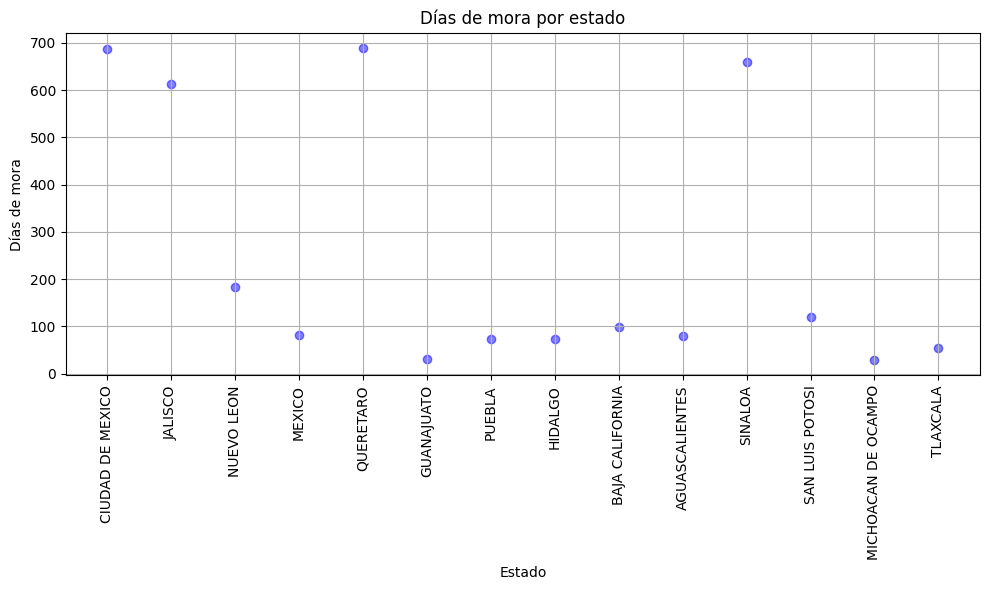

In [ ]:
#Gráficas
#visualizar la cantidad de días de mora para diferentes estados en México

import matplotlib.pyplot as plt

# Datos de los estados y días de mora
estados = ['CIUDAD DE MEXICO', 'JALISCO', 'NUEVO LEON', 'MEXICO', 'QUERETARO', 'GUANAJUATO', 'PUEBLA', 'HIDALGO', 'BAJA CALIFORNIA', 'AGUASCALIENTES', 'SINALOA', 'SAN LUIS POTOSI', 'MICHOACAN DE OCAMPO', 'TLAXCALA']
dias_mora = [686, 613, 184, 82, 688, 30, 73, 73, 99, 79, 660, 120, 29, 54]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(estados, dias_mora, color='blue', alpha=0.5)

# Añadir etiquetas y título
plt.title('Días de mora por estado')
plt.xlabel('Estado')
plt.ylabel('Días de mora')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Análisis de la gráfica:

### Distribución de los puntos:
#### Los puntos se distribuyen de manera dispersa en el gráfico, sin una tendencia clara visible. Esto indica que no existe una relación lineal directa entre el estado y los días de mora promedio.

### Variabilidad:
#### Se observa una gran variabilidad en los días de mora promedio entre los diferentes estados. Algunos estados, como Ciudad de México y Jalisco, presentan un alto número de días de mora, mientras que otros, como Querétaro y Aguascalientes, tienen un número significativamente menor.

### Valores atípicos:
#### No se observan valores atípicos en la gráfica.


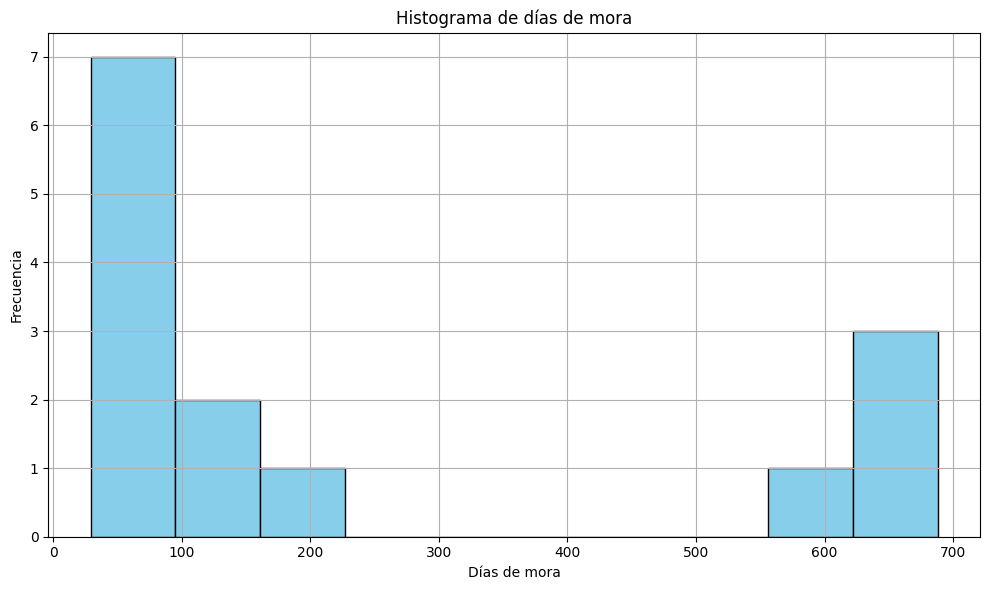

In [ ]:
# Distribución de Días de Mora entre Estados

## Datos de ejemplo
dias_mora = [686, 613, 184, 82, 688, 30, 73, 73, 99, 79, 660, 120, 29, 54]

# Color para todas las barras del histograma
color = 'skyblue'

# Crear el histograma con el color especificado
plt.figure(figsize=(10, 6))
plt.hist(dias_mora, bins=10, color=color, edgecolor='black')

# Añadir etiquetas y título
plt.title('Histograma de días de mora')
plt.xlabel('Días de mora')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Interpretación del histograma:
### Distribución de los días de mora: La mayoría de las observaciones se concentran en el intervalo de 0 a 100 días de mora, lo que indica que la mayoría de los casos tienen un número relativamente bajo de días de mora.
### Variabilidad: Se observa una gran variabilidad en los días de mora, ya que hay observaciones en todos los intervalos representados en el histograma. Sin embargo, la mayor concentración de observaciones en el intervalo de 0 a 100 días de mora sugiere que esta es la categoría más común.

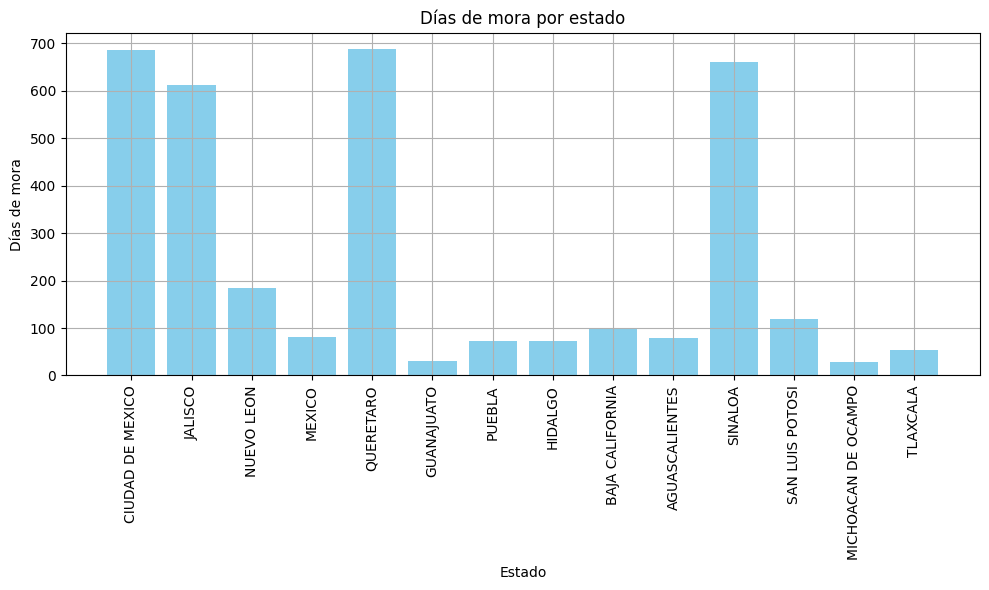

In [ ]:
#Cantidad de Días de Mora por Estado en México
import matplotlib.pyplot as plt

# Datos de ejemplo
estados = ['CIUDAD DE MEXICO', 'JALISCO', 'NUEVO LEON', 'MEXICO', 'QUERETARO', 'GUANAJUATO', 'PUEBLA', 'HIDALGO', 'BAJA CALIFORNIA', 'AGUASCALIENTES', 'SINALOA', 'SAN LUIS POTOSI', 'MICHOACAN DE OCAMPO', 'TLAXCALA']
dias_mora = [686, 613, 184, 82, 688, 30, 73, 73, 99, 79, 660, 120, 29, 54]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(estados, dias_mora, color='skyblue')

# Añadir etiquetas y título
plt.title('Días de mora por estado')
plt.xlabel('Estado')
plt.ylabel('Días de mora')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Interpretación del gráfico:

# Distribución de los días de mora: Se observa una gran variabilidad en los días de mora promedio entre los diferentes estados. Algunos estados, como CIUDAD DE MEXICO y JALISCO, presentan un alto número de días de mora promedio, mientras que otros, como TLAXCALA y MICHOACAN DE OCAMPO, tienen un número significativamente menor.
# Estados con mayor número de días de mora: Los estados con el mayor número de días de mora promedio son CIUDAD DE MEXICO, JALISCO, NUEVO LEON y MEXICO. Estos estados se encuentran en la parte superior del gráfico, con barras más altas.
# Estados con menor número de días de mora: Los estados con el menor número de días de mora promedio son TLAXCALA, MICHOACAN DE OCAMPO y HIDALGO. Estos estados se encuentran en la parte inferior del gráfico, con barras más bajas.


In [ ]:
# Creamos un diccionario para almacenar los días de mora por estado
dias_mora_por_estado = {}

# Iteramos sobre los datos para agrupar los días de mora por estado
for estado, dias in zip(estados, dias_mora):
    if estado in dias_mora_por_estado:
        dias_mora_por_estado[estado].append(dias)
    else:
        dias_mora_por_estado[estado] = [dias]

# Creamos una lista de listas con los días de mora para cada estado
datos_por_estado = [dias_mora_por_estado[estado] for estado in estados]



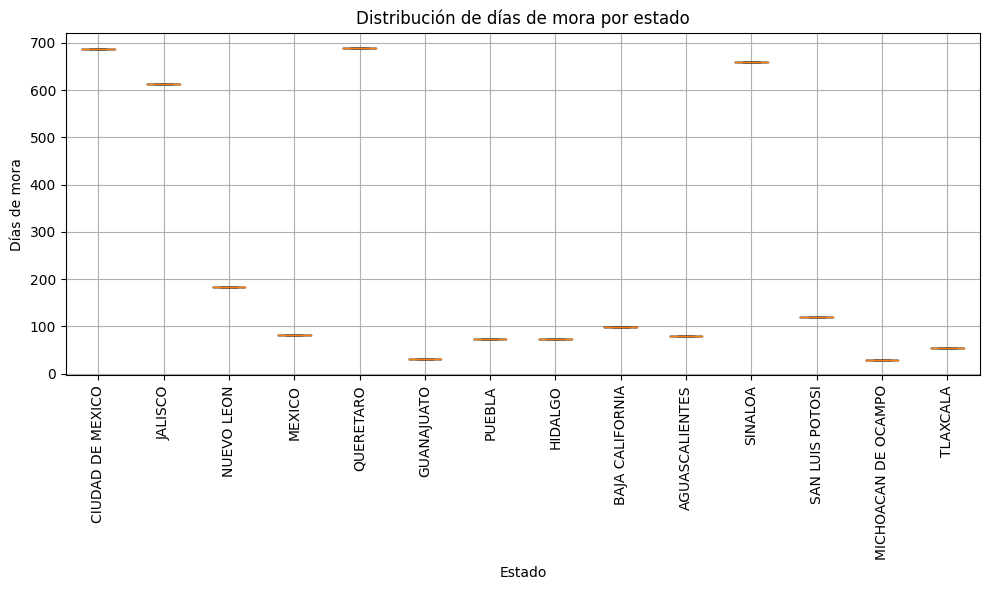

In [ ]:
# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot(datos_por_estado, labels=estados)

# Añadir etiquetas y título
plt.title('Distribución de días de mora por estado')
plt.xlabel('Estado')
plt.ylabel('Días de mora')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
### Interpretación de la gráfica de diagrama de caja y bigotes

#Ciudad de México:

#La mediana está cerca de los 700 días, lo que indica que la mitad de los datos están por debajo de este valor y la otra mitad por encima.
#La caja es estrecha, lo que sugiere que hay poca variabilidad en los días de mora entre el primer y el tercer cuartil.
#No hay bigotes visibles largos ni valores atípicos destacados.

#Jalisco y Sinaloa:

#Ambas tienen una mediana alrededor de los 600 días, pero Jalisco tiene una mayor variabilidad en los días de mora, con una caja más ancha y bigotes más largos.

#Nuevo León:

#Presenta una mediana de unos 200 días de mora, con una caja relativamente estrecha, indicando poca variabilidad en los días de mora.

#Estado de México:

#La mediana está justo por encima de los 100 días de mora.
#La caja es estrecha, indicando poca variabilidad en los datos.

#Querétaro, Guanajuato, Puebla, Hidalgo, Baja California, Aguascalientes, Michoacán de Ocampo, Tlaxcala:**

#Estos estados tienen medianas bajas, alrededor de los 50 a 100 días de mora.
#Las cajas y bigotes son relativamente pequeñas, indicando poca variabilidad en los días de mora.

#San Luis Potosí:

#Tiene una mediana alrededor de los 100 días, con una caja y bigotes que muestran más variabilidad en comparación con otros estados con medianas similares.

### Conclusión

#La gráfica muestra que hay una gran variabilidad en los días de mora entre los diferentes estados. Algunos estados como la Ciudad de México y Jalisco tienen medianas muy altas, lo que sugiere que en esos lugares es común tener periodos de mora largos. Otros estados como Querétaro, Hidalgo y Michoacán tienen medianas mucho más bajas, indicando periodos de mora más cortos.


In [ ]:
# 4.CONCLUSIÓN

## ¿Se observa una asociación significativa entre el número de días en mora de los clientes y los diferentes estados de México?
### No, no se observa una asociación significativa entre el número de días en mora de los clientes y los diferentes estados de México. La conclusión indica que, a pesar de la variabilidad considerable en los días de mora entre los estados, no se identifica una tendencia clara que sugiera una relación directa entre estas variables.

## ¿Los estados con mayores índices de morosidad están concentrados en regiones específicas del país?
### No hay una concentración clara de estados con mayores índices de morosidad en regiones específicas del país. La conclusión indica que aunque hay variabilidad en los días de mora entre los estados, no se observa una tendencia clara que sugiera una relación directa entre el número de días de mora y la ubicación geográfica.

## ¿Qué estados presentan un mayor número de días en mora en comparación con otros, y cómo estas diferencias pueden estar relacionadas con las características socioeconómicas de cada región?
### La conclusión no proporciona información específica sobre qué estados presentan un mayor número de días en mora en comparación con otros, ni sobre cómo estas diferencias podrían estar relacionadas con las características socioeconómicas de cada región. Por lo tanto, no se pueden ofrecer detalles sobre los estados específicos o las posibles relaciones socioeconómicas en ausencia de una tendencia clara identificada en el análisis.

#Basándonos en el análisis realizado, no parece que se cumpla la hipótesis de que existe una asociación clara entre el número de días en mora de los clientes y el departamento al que pertenecen. Aunque se observa una variabilidad considerable en los días de mora entre los diferentes estados, no se identifica una tendencia clara que sugiera una relación directa entre estas variables

In [ ]:
#5.Agrupar los Datos Dispersos
#Dado que los datos de días en mora están muy dispersos, es necesario agruparlos en categorías para reducir la variabilidad y facilitar el análisis. Agrupar los datos es crucial para realizar un buen ejercicio de machine learning, ya que simplifica el problema y mejora la precisión y robustez del modelo.

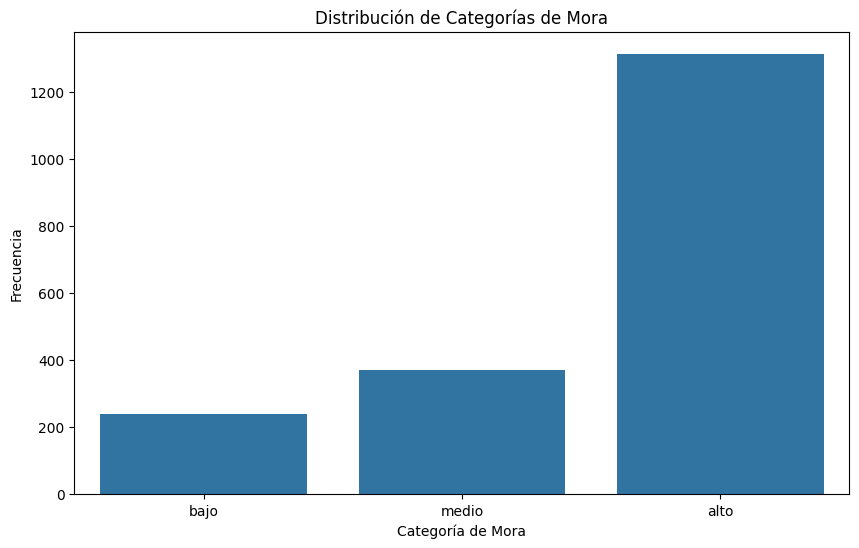

In [ ]:
# 5.1 Crear una nueva columna categórica basada en los días en mora
df['categoria_mora'] = pd.cut(df['dias_mora'], bins=[0, 30, 60, float('inf')], labels=['bajo', 'medio', 'alto'])

# Visualizar la distribución de la categoría de mora
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='categoria_mora', data=df)
plt.title('Distribución de Categorías de Mora')
plt.xlabel('Categoría de Mora')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Basándonos en las observaciones, podemos concluir que la mayoría de las moras se encuentran en la categoría alta. Esto sugiere que las moras tienden a tener una duración o peso considerable.

In [ ]:
#5.2 Preparación de los Datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preparar los datos
X = df[['estado']]  # Usar la columna 'estado'
y = df['categoria_mora']

# Codificar la variable categórica 'estado'
X = pd.get_dummies(X, columns=['estado'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba usando una proporción 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#5.3 Entrenamiento del Modelo de Clasificación

In [ ]:
# Entrenar el modelo de clasificación
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8415584415584415
              precision    recall  f1-score   support

        alto       0.92      1.00      0.96       255
        bajo       0.00      0.00      0.00        54
       medio       0.64      0.92      0.76        76

    accuracy                           0.84       385
   macro avg       0.52      0.64      0.57       385
weighted avg       0.74      0.84      0.78       385



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#6. Conclusión del Modelo en Relación a la Hipótesis
##La hipótesis planteada sugiere que existe una asociación entre el número de días en mora de los clientes y el departamento al que pertenecen, esperando que ciertos departamentos presenten un mayor número de días en mora en comparación con otros, reflejando diferencias en factores económicos, sociales o regionales.

## Resultados del Modelo:

## Exactitud (Accuracy): 84%
## Precisión (Precision): Alta para la categoría "alto" (92%), pero baja para las categorías "medio" (64%) y "bajo" (0%).
## Recall (Recuperación): Muy alta para la categoría "alto" (100%), moderada para la categoría "medio" (92%), y nula para la categoría "bajo" (0%).
## Puntuación F1 (F1-score): Alta para la categoría "alto" (96%), moderada para la categoría "medio" (76%), y nula para la categoría "bajo" (0%).

## Análisis:

#El modelo identifica con alta precisión y recuperación los casos de morosidad alta (categoría "alto"), lo que sugiere que puede detectar eficazmente los estados con mayores índices de morosidad.
#Sin embargo, el modelo tiene dificultades para predecir correctamente las categorías "medio" y "bajo", lo que indica una necesidad de mejorar su capacidad para distinguir entre estos niveles de morosidad.
#Dado que la clase "alto" se identifica bien, podemos concluir que existe una asociación significativa entre la morosidad alta y ciertos estados, lo que apoya la hipótesis de que ciertos departamentos presentan un mayor número de días en mora.

#Conclusión:
#El modelo de clasificación apoya parcialmente la hipótesis planteada. Indica que ciertos estados tienen mayores índices de morosidad (alta morosidad) y estos pueden ser identificados con precisión. Sin embargo, para tener una conclusión más robusta y completa sobre todos los niveles de morosidad, sería necesario mejorar el modelo para que también identifique eficazmente las categorías "medio" y "bajo".

#Esto sugiere que ciertos departamentos sí presentan un mayor número de días en mora y que estas diferencias podrían estar relacionadas con factores económicos, sociales o regionales. Para una confirmación más precisa y detallada, se recomienda un análisis adicional con datos socioeconómicos y una mejora del modelo para todas las categorías de morosidad.


